Hello World Graph

In [4]:
!pip install typing langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 22.7 MB/s eta 0:00:00
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26304 sha256=4b21e8b09c75249a0b7e68b2b0104100ea1d93a2f73350282fe3c40def85ef08
  Stored in directory: /root/.cache/pip/wheels/9d/67/2f/53e3ef32ec48d11d7d60245255e2d71e908201d20c880c08ee
Successfully built typing


In [1]:
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph, START, END

Graph I

In [2]:
class AgentState(TypedDict):
    message : str


def greeting_node(state: AgentState) ->AgentState:
    """Simple Node that add greetings message to the state"""

    state["message"] = "Hey " + state["message"] + ", how is your day going?"
    return state

In [3]:
graph = StateGraph(AgentState)

graph.add_node("greeter", greeting_node)
graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app = graph.compile()

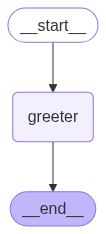

In [4]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [5]:
result = app.invoke({"message":"Bob"})

In [6]:
result["message"]

'Hey Bob, how is your day going?'

Exercise for Graph I : Personized Compliment Agent

In [13]:
class AgentState1(TypedDict):
    message : str

def complimenting_node(state: AgentState) ->AgentState:
    """Simple node that add compliment to the state"""
    state["message"] = state["message"] + ", you're doing an amazing job learning langgraph!"
    return state

In [14]:
graph = StateGraph(AgentState1)
graph.add_node("complimenter", complimenting_node)
graph.set_entry_point("complimenter")
graph.set_finish_point("complimenter")

app = graph.compile()

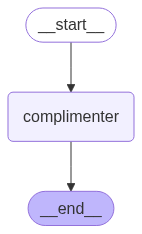

In [15]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
result = app.invoke({"message":"Bob"})

In [17]:
result["message"]

"Bob, you're doing an amazing job learning langgraph!"

Graph II

In [22]:
class AgentState(TypedDict):
  values : List[int]
  name: str
  result: str

def process_values(state: AgentState) ->AgentState:
  state["result"] = f"hi there {state['name']} Your sum = {sum(state['values'])}"
  return state

In [23]:
graph = StateGraph(AgentState)
graph.add_node("processor", process_values)
graph.set_entry_point("processor")
graph.set_finish_point("processor")
app = graph.compile()

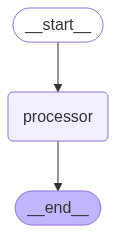

In [24]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [25]:
result = app.invoke({"values":[1,2,3], "name":"Bob"})
result["result"]

'hi there Bob Your sum = 6'

In [26]:
result

{'values': [1, 2, 3], 'name': 'Bob', 'result': 'hi there Bob Your sum = 6'}

Exercise for Graph II

In [30]:
import math
class AgentState(TypedDict):
  values : List[int]
  name: str
  result: str

def process_values(state: AgentState) ->AgentState:
  if state["result"] == "+":
      state["result"] = f"hi there {state['name']} Your sum = {sum(state['values'])}"
  else:
      state["result"] = f"hi there {state['name']} Your product = {math.prod(state['values'])}"
  return state

In [31]:
graph = StateGraph(AgentState)
graph.add_node("processor", process_values)
graph.set_entry_point("processor")
graph.set_finish_point("processor")
app = graph.compile()

In [33]:
results = app.invoke({"values":[1,2,3], "name":"Bob", "result":"*"})

In [34]:
results

{'values': [1, 2, 3], 'name': 'Bob', 'result': 'hi there Bob Your product = 6'}

Graph III: Sequential Graph

In [2]:
class AgentState(TypedDict):
  name: str
  age : int
  final : str

def first_node(state : AgentState) -> AgentState:
  state["final" ] = f"Hi {state['name']}"
  return state

def second_node(state: AgentState) -> AgentState:
  state['final'] = state['final'] + f"You are {state['age']} years old"
  return state

In [3]:
graph = StateGraph(AgentState)

graph.add_node('first', first_node)
graph.add_node('second', second_node)
graph.add_edge('first','second')
graph.set_entry_point('first')
graph.set_finish_point('second')

app = graph.compile()

In [4]:
result = app.invoke({"name": "Charlie", "age": 20})
print(result)

{'name': 'Charlie', 'age': 20, 'final': 'Hi CharlieYou are 20 years old'}


Exercise for Graph III

In [29]:
class AgentState(TypedDict):
  name: str
  age : int
  skills : list
  final_result : str

def first_node(state:AgentState) -> AgentState:
    """This node will greet the user"""

    state["final_result"] = state["name"] + f" welcome to the system!"
    return state

def second_node(state:AgentState) -> AgentState:
    """This node will describe the user's age"""

    state["final_result"] = state["final_result"] + f" You are {state['age']} years old!"
    return state


def third_node(state:AgentState) -> AgentState:
    """This node will list the user's skills in a formatted string"""
    state["final_result"] = state["final_result"] + f" You have skills in: " + str(", ".join(state['skills']))

    return state


In [30]:
 graph = StateGraph(AgentState)

graph.add_node('first', first_node)
graph.add_node('second', second_node)
graph.add_node('third', third_node)
graph.add_edge('first','second')
graph.add_edge('second','third')
graph.set_entry_point('first')
graph.set_finish_point('third')

app = graph.compile()

In [32]:
result = app.invoke({"name": "Charlie", "age": 20, "skills": ["Python", "ML", "langraph"]})
print(result['final_result'])

Charlie welcome to the system! You are 20 years old! You have skills in: Python, ML, langraph


Graph IV: Conditional Graph

In [49]:
class AgentState(TypedDict):
  num2: int
  num1 : int
  final_num : int
  operation : str

def add_node(state:AgentState) -> AgentState:
    """This node will adds the numbers"""

    state["final_num"] = state["num1"] + state["num2"]
    return state


def substract_node(state:AgentState) -> AgentState:
    """This node will substrates the numbers"""

    state["final_num"] = state["num1"] - state["num2"]
    return state

def multiply_node(state:AgentState) -> AgentState:
    """This node will multiplys the numbers"""

    state["final_num"] = state["num1"] * state["num2"]
    return state

def decide_next_node(state:AgentState) -> AgentState:
    """This node will select the nect node"""
    if state["operation"] == "+":
        return "addition_operation"
    elif state["operation"] == "-":
        return "substraction_operation"
    elif state["operation"] == "*":
        return "multiplication_operation"

graph = StateGraph(AgentState)
graph.add_node("adder", add_node)
graph.add_node("substracter", substract_node)
graph.add_node("multiplyer", multiply_node)
graph.add_node("router", lambda state:state) # passthrough function

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_operation" : "adder",
        "substraction_operation" : "substracter",
        "multiplication_operation" : "multiplyer",
    },
)

graph.add_edge("adder", END)
graph.add_edge("substracter", END)
graph.add_edge("multiplyer", END)

app = graph.compile()

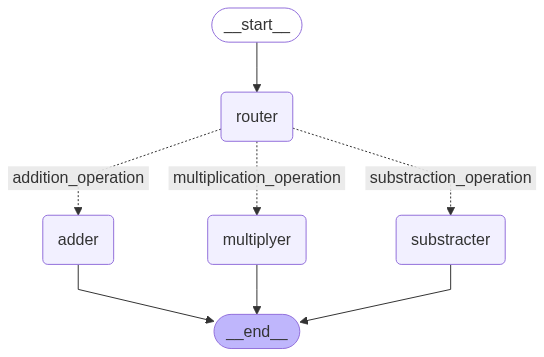

In [50]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [52]:
initial_state = {"num1": 10, "num2": 5, "operation": "*"}
result = app.invoke(initial_state)
print(result)

{'num2': 5, 'num1': 10, 'final_num': 50, 'operation': '*'}


Exercise Graph IV

In [53]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int
    number3: int
    operation2: str
    number4: int
    finalNumber2: int

def adder(state:AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    print("adder")
    state["finalNumber"] = state["number1"] + state["number2"]
    return state

def subtractor(state:AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    print("subtractor")
    state["finalNumber"] = state["number1"] - state["number2"]
    return state

def decide_next_node(state:AgentState) -> AgentState:
    """This node will select the next phase"""
    if state["operation"] == "+":
        return "addition_operation"

    elif state["operation"] == "-":
        print("SUB 1")
        return "subtraction_operation"


def adder2(state:AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    print("adder1")
    state["finalNumber2"] = state["number3"] + state["number4"]
    print(state["finalNumber2"])

    return state

def subtractor2(state:AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    print("subtractor1")
    state["finalNumber2"] = state["number3"] - state["number4"]
    print(state["finalNumber2"])
    return state

def decide_next_node1(state:AgentState) -> AgentState:
    """This node will select the next phase"""
    if state["operation2"] == "+":
        print("ADD1")
        return "addition_operation2"

    elif state["operation2"] == "-":
        return "subtraction_operation2"
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state:state)

graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", subtractor2)
graph.add_node("router2", lambda state:state)


graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        # Edge: Node format
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)


graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")

graph.add_conditional_edges(
    "router2",
    decide_next_node1,
    {
        # Edge: Node format
        "addition_operation2": "add_node2",
        "subtraction_operation2": "subtract_node2"
    }
)


graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()


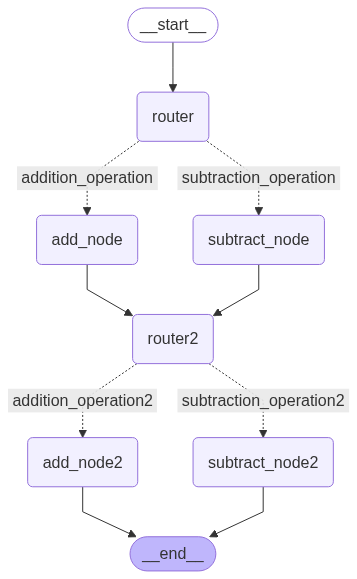

In [54]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [55]:
initial_state = AgentState(number1 = 10, operation="-", number2 = 5, number3 = 7, number4=2, operation2="+", finalNumber= 0, finalNumber2 = 0)
print(app.invoke(initial_state))

SUB 1
subtractor
ADD1
adder1
9
{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5, 'number3': 7, 'operation2': '+', 'number4': 2, 'finalNumber2': 9}


Graph V : Graph Looping

In [2]:
import random

In [17]:
class AgentState(TypedDict):
  name: str
  number:int
  counter: int

In [18]:
def greeting_node(state: AgentState) -> AgentState:
    """Greeting Node which says hi to the person"""
    state["name"] = f"Hi there, " + state["name"]
    state["counter"] = 0

    return state

def random_node(state: AgentState) -> AgentState:
    """Generates a random number from 0 to 10"""
    state["number"].append(random.randint(0, 10))
    state["counter"] += 1

    return state


def should_continue(state: AgentState) -> AgentState:
    """Function to decide what to do next"""
    if state["counter"] < 5:
        print("ENTERING LOOP", state["counter"])
        return "loop"  # Continue looping
    else:
        return "exit"  # Exit the loop

In [19]:

graph = StateGraph(AgentState)

graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_edge("greeting", "random")


graph.add_conditional_edges(
    "random",     # Source node
    should_continue, # Action
    {
        "loop": "random",
        "exit": END
    }
)

graph.set_entry_point("greeting")

app = graph.compile()

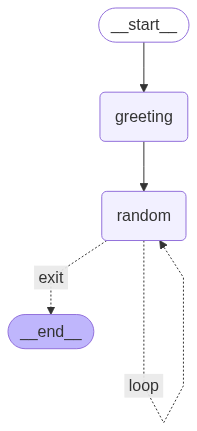

In [20]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [21]:
app.invoke({"name":"Ayush", "number":[],"counter":-1})

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4


{'name': 'Hi there, Ayush', 'number': [7, 4, 3, 6, 8], 'counter': 5}

Exercise: Graph V

In [22]:
class GameState(TypedDict):
    player_name: str
    target_number: int
    guesses: List[int]
    attempts: int
    hint: str
    lower_bound: int
    upper_bound: int

In [23]:
def setup_node(state: GameState) -> GameState:
    """Initialize the game with a random target number"""
    state["player_name"] = f"Welcome, {state['player_name']}!"
    state["target_number"] = random.randint(1, 20)
    state["guesses"] = []
    state["attempts"] = 0
    state["hint"] = "Game started! Try to guess the number."
    state["lower_bound"] = 1
    state["upper_bound"] = 20
    print(f"{state['player_name']} The game has begun. I'm thinking of a number between 1 and 20.")
    return state

In [24]:
def guess_node(state: GameState) -> GameState:
    """Generate a smarter guess based on previous hints"""

    possible_guesses = [i for i in range(state["lower_bound"], state["upper_bound"] + 1) if i not in state["guesses"]]
    if possible_guesses:
        guess = random.choice(possible_guesses)
    else:

        guess = random.randint(state["lower_bound"], state["upper_bound"])

    state["guesses"].append(guess)
    state["attempts"] += 1
    print(f"Attempt {state['attempts']}: Guessing {guess} (Current range: {state['lower_bound']}-{state['upper_bound']})")
    return state

In [25]:
def hint_node(state: GameState) -> GameState:
    """Here we provide a hint based on the last guess and update the bounds"""
    latest_guess = state["guesses"][-1]
    target = state["target_number"]

    if latest_guess < target:
        state["hint"] = f"The number {latest_guess} is too low. Try higher!"

        state["lower_bound"] = max(state["lower_bound"], latest_guess + 1)
        print(f"Hint: {state['hint']}")

    elif latest_guess > target:
        state["hint"] = f"The number {latest_guess} is too high. Try lower!"

        state["upper_bound"] = min(state["upper_bound"], latest_guess - 1)
        print(f"Hint: {state['hint']}")
    else:
        state["hint"] = f"Correct! You found the number {target} in {state['attempts']} attempts."
        print(f"Success! {state['hint']}")

    return state

In [26]:
def should_continue(state: GameState) -> str:
    """Determine if we should continue guessing or end the game"""

    # There are 2 end conditions - either 7 is reached or the correct number is guessed

    latest_guess = state["guesses"][-1]
    if latest_guess == state["target_number"]:
        print(f"GAME OVER: Number found!")
        return "end"
    elif state["attempts"] >= 7:
        print(f"GAME OVER: Maximum attempts reached! The number was {state['target_number']}")
        return "end"
    else:
        print(f"CONTINUING: {state['attempts']}/7 attempts used")
        return "continue"

In [27]:
graph = StateGraph(GameState)
graph.add_node("setup", setup_node)
graph.add_node("guess", guess_node)
graph.add_node("hint_node", hint_node)


graph.add_edge("setup", "guess")
graph.add_edge("guess", "hint_node")


graph.add_conditional_edges(
    "hint_node",
    should_continue,
    {
        "continue": "guess",
        "end": END
    }
)

graph.set_entry_point("setup")
app = graph.compile()

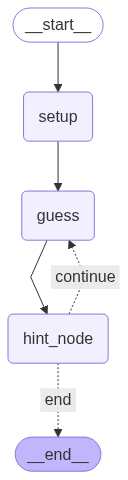

In [28]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [29]:
result = app.invoke({"player_name": "Student", "guesses": [], "attempts": 0, "lower_bound": 1, "upper_bound": 20})


Welcome, Student! The game has begun. I'm thinking of a number between 1 and 20.
Attempt 1: Guessing 7 (Current range: 1-20)
Hint: The number 7 is too low. Try higher!
CONTINUING: 1/7 attempts used
Attempt 2: Guessing 15 (Current range: 8-20)
Success! Correct! You found the number 15 in 2 attempts.
GAME OVER: Number found!
